# Predict Food Delivery Time

### 문제설명
이번 과제를 통해 여러분은 음식배달 서비스(배민, 쿠팡이츠 등)를 위한 예측모델을 만들게 될 것입니다! 이 모델이 예측하는 값은 “음식배달에 걸리는 시간"입니다. 배달시간을 정확하게 예측하는 것은 사용자의 경험에 많은 영향을 미치게 됩니다.\
예측된 배달시간보다 실제 배달시간이 더 걸린 경우(under-prediction)가 반대의 경우(over-prediction)보다 두 배로 사용자의 경험에 안 좋은 영향을 준다고 알려져 있습니다.\
가능한 실제 배달시간과 가까운 값을 예측하되 동시에 under-prediction을 최소화하는 것이 좋은 예측모델입니다.

### 학습/테스트 데이터
파일 “predict_delivery_time.csv”는 다음과 같은 속성들을 가지고 있습니다.

- Restaurant, Location, Cuisines, AverageCost, MinimumOrder, Rating, Votes, Reviews 속성들을 모델의 입력속성으로 사용하세요. 모델의 학습목표는 DeliveryTime입니다.
- 이 데이터에서 랜덤하게 20%를 추출해서 테스트 데이터로 사용하고 나머지는 학습데이터로 사용하세요.

### 제출할 결과물
- 간단한 요약문
- 데이터 전처리와 속성 생성에 대한 간단한 설명
- 학습을 위해서 어떤 모델을 사용했는지 그리고 어떠한 손실함수를 사용했는지를 간단히 설명
- 테스트 데이터에 대한 평가지표들 (아래 두가지를 반드시 포함할 것)
- Mean Absolute Error (MAE)
- Under-prediction의 비율 (under-prediction 개수 / 테스트 데이터의 샘플수)
- 모델 학습에 사용한 Jupyter notebook 파일

## 1. 큰 그림을 봅니다 (look at the big picture).

이번 과제를 통해 여러분은 음식배달 서비스(배민, 쿠팡이츠 등)를 위한 예측모델을 만들게 될 것입니다! \
이 모델이 예측하는 값은 “음식배달에 걸리는 시간"입니다. 배달시간을 정확하게 예측하는 것은 사용자의 경험에 많은 영향을 미치게 됩니다.

예측된 배달시간보다 실제 배달시간이 더 걸린 경우(under-prediction)가 반대의 경우(over-prediction)보다 두 배로 사용자의 경험에 안 좋은 영향을 준다고 알려져 있습니다.\
가능한 실제 배달시간과 가까운 값을 예측하되 동시에 under-prediction을 최소화하는 것이 좋은 예측모델입니다.

### 풀어야할 문제 : 음식배달 데이터를 활용해 음식 배달 시간 예측 모델을 만드는 것

실제 배달시간과 가까운 값을 예측: 지도학습
동시에 under-prediction을 최소화하는 것이 좋은 예측모델 -> 이건 어떻게 풀 수 있을까?

### 성능측정 지표
Mean Absolute Error (MAE)
Under-prediction의 비율 (under-prediction 개수 / 테스트 데이터의 샘플수)

## 2. 데이터를 구합니다 (get the data).

In [1]:
# import common libraries
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
food = pd.read_csv('predict_delivery_time.csv')

### 데이터 톺아보기

In [3]:
food.head()

,Restaurant,Location,Cuisines,AverageCost,MinimumOrder,Rating,Votes,Reviews,DeliveryTime
0,ID6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12.0,4.0,30
1,ID2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11.0,4.0,30
2,ID1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99.0,30.0,65
3,ID5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176.0,95.0,30
4,ID6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521.0,235.0,65


### 여기서 다루는 변수는 다음과 같다.

- Restaurant: A unique ID that represents a restaurant.
- Location: The location of the restaurant.
- Cuisines: The cuisines offered by the restaurant.
- Average_Cost: The average cost for one person/order.
- Minimum_Order: The minimum order amount.
- Rating: Customer rating for the restaurant.
- Votes: The total number of customer votes for the restaurant.
- Reviews: The number of customer reviews for the restaurant.
- Delivery_Time: The order delivery time of the restaurant. (Target Classes)

In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Restaurant    11094 non-null  object 
 1   Location      11094 non-null  object 
 2   Cuisines      11094 non-null  object 
 3   AverageCost   11094 non-null  object 
 4   MinimumOrder  11094 non-null  int64  
 5   Rating        9903 non-null   object 
 6   Votes         9020 non-null   float64
 7   Reviews       8782 non-null   float64
 8   DeliveryTime  11094 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 780.2+ KB


In [5]:
food.isnull().sum()

Restaurant         0
Location           0
Cuisines           0
AverageCost        0
MinimumOrder       0
Rating          1191
Votes           2074
Reviews         2312
DeliveryTime       0
dtype: int64

In [6]:
food.describe()

,MinimumOrder,Votes,Reviews,DeliveryTime
count,11094.000000,9020.000000,8782.000000,11094.000000
mean,53.344511,244.544457,123.247893,37.056066
std,18.551245,555.094733,321.025216,12.447496
min,0.000000,3.000000,1.000000,10.000000
25%,50.000000,19.000000,7.000000,30.000000
50%,50.000000,63.000000,26.000000,30.000000
75%,50.000000,216.000000,91.000000,45.000000
max,500.000000,9054.000000,6504.000000,120.000000


In [7]:
food.describe(include='O')

,Restaurant,Location,Cuisines,AverageCost,Rating
count,11094,11094,11094,11094,9903
unique,7480,35,2179,26,32
top,ID7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,200,3.7
freq,22,947,850,3241,869


- 간략하게 훑어보고 알 수 있는 사실
1. target label: DeliveryTime 연속변수이며, 최소 10에서 120까지 분포되어 있어 분 단위일 것으로 예상됩니다.
2. AverageCost, Rating 은 numerical 같이 생겼는데 object라고 뜹니다. 어떤 value들이 들어가 있는지 잘 봐야할 것 같습니다.
3. Rating, Votes, Reviews에는 결측치가 상당수 있습니다.
4. Reviews의 분포와 feature에 대한 설명을 보니 점수가 아니라 리뷰의 갯수인 것 같습니다. negative/positive 내용이 구분되어있지 않습니다.
5. Votes 역시 feature의 설명을 보니 긍정적인 의미의 vote의 갯수인지, 그냥 투표를 한 갯수를 의미하는 건지 잘 모르겠네요.
6. object인 변수도 간단하게 살펴보았는데, unique 값이 26개인 feature 부터 7480개인 feature까지 다양합니다. AverageCost와 Rating은 빈출값만 봐도 numerical 한 데이터 같은데 왜 object인지 살펴볼 필요가 있습니다.

In [27]:
# 우리가 예측해야 하는 y-labels DeliveryTime을 봅시다.
food["DeliveryTime"].value_counts()

30     7406
45     2665
65      923
120      62
20       20
80       14
10        4
Name: DeliveryTime, dtype: int64

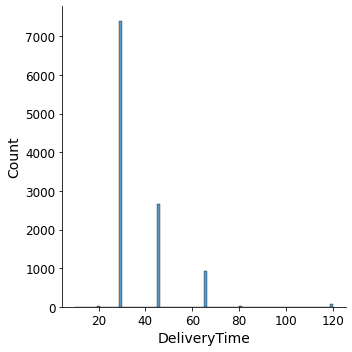

In [31]:
sns.displot(food["DeliveryTime"])

연속형 변수라기에는 약간 애매한 값을 보인다. 
7개의 값만 가지고 있다 그나마 대부분, 30, 45, 65이다.

## 3. 데이터로부터 통찰을 얻기 위해 탐색하고 시각화합니다 (discover and visualize the data to gain insights).

### 3-1. 데이터 탐색

각 feature들을 범주형 / 연속형으로 나누어 특성에 맞게 살펴보겠습니다.

In [8]:
food.columns

Index(['Restaurant', 'Location', 'Cuisines', 'AverageCost', 'MinimumOrder',
       'Rating', 'Votes', 'Reviews', 'DeliveryTime'],
      dtype='object')

In [9]:
num_col = []
cat_col = []
for i in food.columns:
    if food[i].dtypes == 'int64' or food[i].dtypes == 'float64':
        num_col.append(i)
    else: cat_col.append(i)

In [10]:
print("numerical columns:", num_col)
print("categorical columns:", cat_col)

numerical columns: ['MinimumOrder', 'Votes', 'Reviews', 'DeliveryTime']
categorical columns: ['Restaurant', 'Location', 'Cuisines', 'AverageCost', 'Rating']


범주형 데이터에 어떤 values들이 들어있는지 보겠습니다.

In [11]:
food['Restaurant'].value_counts()

ID7184    22
ID4625    20
ID7295    20
ID5321    19
ID5538    19
          ..
ID1125     1
ID7947     1
ID3308     1
ID3022     1
ID7753     1
Name: Restaurant, Length: 7480, dtype: int64

무려 7480개의 레스토랑이 있습니다. 그 중에 빈도가 20회가 넘는 레스토랑들도 있는 반면, 1회인 레스토랑도 많네요.

In [12]:
food['Location'].value_counts()

Mico Layout, Stage 2, BTM Layout,Bangalore          947
DBlock, Sector 63, Noida                            806
Sector 1, Noida                                     791
FTI College, Law College Road, Pune                 584
Delhi UniversityGTB Nagar                           545
Laxman Vihar Industrial Area, Sector 3A, Gurgoan    493
Sector 14, Noida                                    489
Delhi Administration Flats, Timarpur                472
Mumbai Central                                      459
Rmz Centennial, I Gate, Whitefield                  457
Delhi High Court, India Gate                        411
MG Road, Pune                                       402
Nathan Road, Mangaldas Road, Pune                   372
Sandhurst Road, Mumbai CST Area                     370
Sector 3, Marathalli                                366
Majestic                                            334
Delhi Cantt.                                        326
Yerawada, Pune, Maharashtra                     

location feature는 의외로 values의 종류가 많지는 않습니다. 구글지도에서 몇 군데를 검색해본 결과 대부분은 인도 각 도시의 distirct를 가리키는 주소였습니다.

In [13]:
food['Cuisines'].value_counts()

North Indian                                                 850
North Indian, Chinese                                        614
Fast Food                                                    434
South Indian                                                 270
Chinese                                                      245
                                                            ... 
European, Mediterranean                                        1
North Indian, Street Food, Italian, Fast Food, Beverages       1
Bakery, Desserts, Street Food                                  1
European, Mediterranean, North Indian, Asian, Continental      1
Rolls, North Indian, Chinese                                   1
Name: Cuisines, Length: 2179, dtype: int64

In [14]:
food['AverageCost'].value_counts()

200      3241
100      2557
150      2462
250       881
300       537
350       283
400       282
50        265
600       154
500       101
450        63
550        60
650        55
800        44
750        38
900        15
700        15
850        12
1,000      12
1,200       8
950         4
1,400       1
1,150       1
1,100       1
2,050       1
for         1
Name: AverageCost, dtype: int64

'for' 하나 때문에 numerical feature가 안된 것 같다.

In [15]:
food['Rating'].unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', nan, '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon', '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'],
      dtype=object)

'New', Opening Soon', 'Temporarily Closed' 같은 변수들은 사실 Rating이 없다고 봐야할 것 같다.

연속형 데이터들의 분포를 보겠습니다.

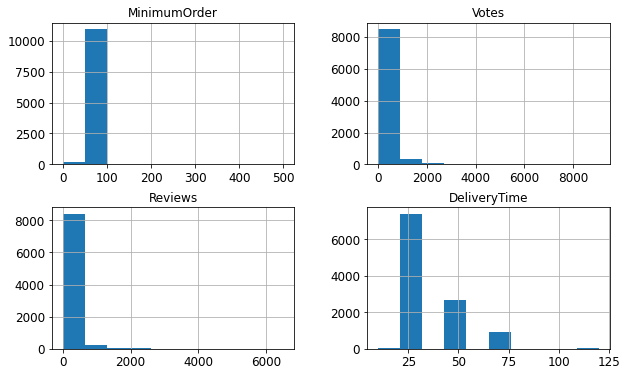

In [16]:
food.hist(figsize=(10,6))
plt.show()

고르게 분포되어있지 않은 모습입니다.

### 3-2. 데이터 cleaning

cleaning을 거칠 features 들

1. AverageCost, Rating : 숫자 타입이 아닌 value들 처리하고, 타입 변환
2. Location & Cuisines : 범주형 변수. encoding 전에 처리해야할 부분이 있는지 확인, 처리

1. AverageCost : 특이값을 처리하고, 타입 변환

In [17]:
# 아까 찾았던 이상한 value row를 최빈값으로 대체
food["AverageCost"][food['AverageCost'] == 'for'] = 200

<ipython-input-17-5ff5ac6342f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food["AverageCost"][food['AverageCost'] == 'for'] = 200


In [18]:
food[food['AverageCost'] == 'for']

,Restaurant,Location,Cuisines,AverageCost,MinimumOrder,Rating,Votes,Reviews,DeliveryTime


In [19]:
food['AverageCost'].dtypes

dtype('O')

In [20]:
food['AverageCost'].unique()

array(['200', '100', '150', '250', '650', '350', '800', '50', '400',
       '600', '300', '750', '450', '550', '1,000', '500', '900', '1,200',
       '950', '850', '700', '1,150', 200, '1,100', '1,400', '2,050'],
      dtype=object)

쉼표때문에 숫자로 인식이 안되는 것 같다. 정규표형식으로 빼주려 한다.

In [21]:
import re

food['AverageCost'] = food['AverageCost'].apply(lambda x: int(re.sub("[^0-9]", "", str(x))))

food['AverageCost'].dtypes

dtype('int64')

2. Rating : 숫자 타입이 아닌 value들 처리 후 타입 변환

In [22]:
food['Rating'].mode()

0    3.7
dtype: object

In [23]:
rating_dropna_sampling = food[food.isnull().any(axis=1)]
rating_dropna_sampling 

,Restaurant,Location,Cuisines,AverageCost,MinimumOrder,Rating,Votes,Reviews,DeliveryTime
12,ID1156,"Sector 1, Noida","Burger, Fast Food, Desserts, Beverages",150,50,NaN,NaN,NaN,30
16,ID2141,"Sector 1, Noida",Italian,100,50,NaN,NaN,NaN,30
18,ID5262,Pune University,"Kerala, Bihari",150,50,NaN,NaN,NaN,30
25,ID4944,"Mico Layout, Stage 2, BTM Layout,Bangalore","Desserts, Ice Cream",100,50,NaN,NaN,NaN,45
47,ID2809,"Mico Layout, Stage 2, BTM Layout,Bangalore",Chinese,200,50,NEW,NaN,NaN,30
...,...,...,...,...,...,...,...,...,...
11082,ID1434,"Laxman Vihar Industrial Area, Sector 3A, Gurgoan","North Indian, Chinese, Mughlai",200,50,NaN,NaN,NaN,120
11084,ID968,"Delhi Administration Flats, Timarpur","North Indian, Asian",200,50,NEW,NaN,NaN,30
11085,ID2394,Majestic,Street Food,100,50,NaN,NaN,NaN,30
11086,ID2050,"FTI College, Law College Road, Pune","North Indian, Fast Food",300,50,NaN,NaN,NaN,30


In [24]:
#Rating : 일단 text로 되어 있는 애들은 새로 열었거나 일시적으로 문을 닫은 상태라는 의미이니, nan으로 만들어줌
food['Rating']=pd.to_numeric(food['Rating'].apply(lambda x : np.nan if x in ['Temporarily Closed','Opening Soon','-','NEW'] else x))

In [25]:
food['Rating'].dtypes

dtype('float64')

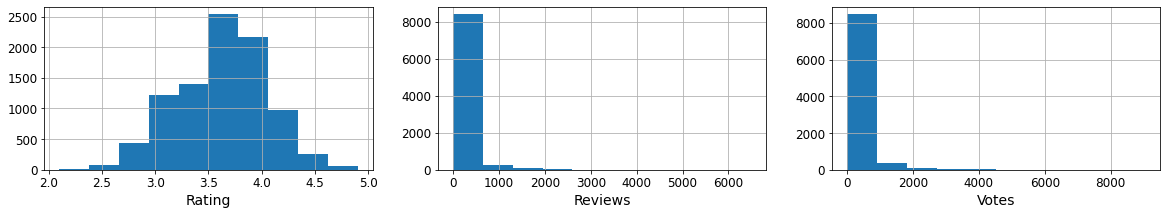

In [26]:
plt.figure(figsize=(20, 3))

ax1 = plt.subplot(131)
food['Rating'].hist()
plt.xlabel('Rating')

ax2 = plt.subplot(132)
food['Reviews'].hist()
plt.xlabel('Reviews')

ax3 = plt.subplot(133)
food['Votes'].hist()
plt.xlabel('Votes')

plt.show()

Rating은 얼추 정규분포 비슷한 형태
Votes와 Reviews는 표나 리뷰를 작성한 갯수라서 대부분은 0에 붙어 있는 작은 값이지만 엄청 큰 outliers들이 있는 분포다.
-> scaling 또는 categorization 필요

2. Location & Cuisines : 범주형 변수. encoding 전에 처리해야할 부분이 있는지 확인, 처리

Location과 Cuisine variable의 가장 큰 특징은 그냥 범주형 변수가 아니라, 한 column안에서 , 를 기준으로 여러 개의 value가 들어가 있다는 점이다.

크게는 8개의 value가 들어가 있다. 이걸 어떻게 처리할까?
1. one hot encoding
2. label encoding
3. multilabel binarizer
4. text count vectorizer

*참고*
https://stackoverflow.com/questions/50473381/scikit-learns-labelbinarizer-vs-onehotencoder

In [161]:
'''
1. one hot encoding
dummied = pd.get_dummies(food['Location'])
dummied
'''

"\n1. one hot encoding\ndummied = pd.get_dummies(food['Location'])\ndummied\n"

In [162]:
food['Cuisines']

0        Fast Food, Rolls, Burger, Salad, Wraps
1                           Ice Cream, Desserts
2               Italian, Street Food, Fast Food
3                Mughlai, North Indian, Chinese
4                               Cafe, Beverages
                          ...                  
11089      Tibetan, Chinese, Continental, Momos
11090                                 Fast Food
11091       South Indian, Chinese, North Indian
11092                              North Indian
11093                              North Indian
Name: Cuisines, Length: 11094, dtype: object

일단 하나의 셀에 있는 여러 값들을 쉼표 단위로 쪼개서 각각의 셀에 넣는다.

In [163]:
food['Cuisines']

0        Fast Food, Rolls, Burger, Salad, Wraps
1                           Ice Cream, Desserts
2               Italian, Street Food, Fast Food
3                Mughlai, North Indian, Chinese
4                               Cafe, Beverages
                          ...                  
11089      Tibetan, Chinese, Continental, Momos
11090                                 Fast Food
11091       South Indian, Chinese, North Indian
11092                              North Indian
11093                              North Indian
Name: Cuisines, Length: 11094, dtype: object

In [164]:
#A function to find the maximun number of features in a single cell
def max_features_in_single_row(data, delimiter):
    max_info = 0 
    item_lis = list(data)
    for i in item_lis:
#         print(i)
        len_of_i = len(i.split(delimiter))
        if len_of_i > max_info:
            max_info = len_of_i 
    return max_info

In [165]:
max_features_in_single_row(food['Cuisines'], ',')

8

In [166]:

#This function splits a column in to n features where n is the maximum number of features in a single cell
def feature_splitter(feat, name, delimiter, max_info):
  item_lis = list(feat)
  extracted_features = {}

  for i in range(max_info):
    extracted_features['{}_Feature_{}'.format(name, i+1)] = []
  
  print("-"*35)
  print("Features Dictionary : ", extracted_features)

  for i in tqdm(range(len(item_lis))):
    for j in range(max_info):  
      try:
        extracted_features['{}_Feature_{}'.format(name,j+1)].append(item_lis[i].split("{}".format(delimiter))[j].lower().strip())
      except: 
        extracted_features['{}_Feature_{}'.format(name, j+1)].append(np.nan)


  return extracted_features

In [167]:
from tqdm import tqdm

In [168]:
#Splitting Location
loc_max = max_features_in_single_row(food['Location'], ',')
Location_splits = feature_splitter(food['Location'], 'Location', ',', loc_max)


100%|██████████| 11094/11094 [00:00<00:00, 167872.64it/s]

-----------------------------------
Features Dictionary :  {'Location_Feature_1': [], 'Location_Feature_2': [], 'Location_Feature_3': [], 'Location_Feature_4': []}


In [169]:
#Splitting Cuisines
cus_max = max_features_in_single_row(food['Cuisines'], ',')
Cuisines_splits = feature_splitter(food['Cuisines'], 'Cuisines', ',', cus_max)

100%|██████████| 11094/11094 [00:00<00:00, 81732.05it/s]

-----------------------------------
Features Dictionary :  {'Cuisines_Feature_1': [], 'Cuisines_Feature_2': [], 'Cuisines_Feature_3': [], 'Cuisines_Feature_4': [], 'Cuisines_Feature_5': [], 'Cuisines_Feature_6': [], 'Cuisines_Feature_7': [], 'Cuisines_Feature_8': []}


In [170]:
cus_df = pd.DataFrame(Cuisines_splits)
cus_df

,Cuisines_Feature_1,Cuisines_Feature_2,Cuisines_Feature_3,Cuisines_Feature_4,Cuisines_Feature_5,Cuisines_Feature_6,Cuisines_Feature_7,Cuisines_Feature_8
0,fast food,rolls,burger,salad,wraps,NaN,NaN,NaN
1,ice cream,desserts,NaN,NaN,NaN,NaN,NaN,NaN
2,italian,street food,fast food,NaN,NaN,NaN,NaN,NaN
3,mughlai,north indian,chinese,NaN,NaN,NaN,NaN,NaN
4,cafe,beverages,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
11089,tibetan,chinese,continental,momos,NaN,NaN,NaN,NaN
11090,fast food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11091,south indian,chinese,north indian,NaN,NaN,NaN,NaN,NaN
11092,north indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
loc_df = pd.DataFrame(Location_splits)
loc_df

,Location_Feature_1,Location_Feature_2,Location_Feature_3,Location_Feature_4
0,fti college,law college road,pune,NaN
1,sector 3,marathalli,NaN,NaN
2,mumbai central,NaN,NaN,NaN
3,sector 1,noida,NaN,NaN
4,rmz centennial,i gate,whitefield,NaN
...,...,...,...,...
11089,btm layout 1,electronic city,NaN,NaN
11090,sector 14,noida,NaN,NaN
11091,majestic,NaN,NaN,NaN
11092,sector 3,marathalli,NaN,NaN


In [172]:
'''
from sklearn.preprocessing import MultiLabelBinarizer

food['Cuisines']

mb_cuisines = MultiLabelBinarizer()

c_values = [_c.split(', ') for _c in food.Cuisines.values]
c_values

y_df = mb_cuisines.fit_transform(c_values)

y_df = pd.DataFrame(y_df)
y_df.head()
'''

"\nfrom sklearn.preprocessing import MultiLabelBinarizer\n\nfood['Cuisines']\n\nmb_cuisines = MultiLabelBinarizer()\n\nc_values = [_c.split(', ') for _c in food.Cuisines.values]\nc_values\n\ny_df = mb_cuisines.fit_transform(c_values)\n\ny_df = pd.DataFrame(y_df)\ny_df.head()\n"

### 3-3. 결측치 처리

1. 연속형 변수들의 결측치 처리

In [173]:
food.isnull().sum()

Restaurant         0
Location           0
Cuisines           0
AverageCost        0
MinimumOrder       0
Rating          1963
Votes           2074
Reviews         2312
DeliveryTime       0
dtype: int64

결측치가 상당히 많아서 버리긴 아깝다.

1. mean
2. median
3. mode
4. 특징에 따라 가까운 값 넣기


-> 일단은 median 값으로 결측치 처리해보기


In [174]:
food["Rating_new"] = food["Rating"].fillna(food["Rating"].median())

In [175]:
food.drop("Rating_new", axis=1, inplace=True)

In [176]:
food.isnull().sum()

Restaurant         0
Location           0
Cuisines           0
AverageCost        0
MinimumOrder       0
Rating          1963
Votes           2074
Reviews         2312
DeliveryTime       0
dtype: int64

In [177]:
def fillnawithmedian(data, var):
    data[f"{var}_filled"] = data[var].fillna(data[var].median())
    return data[f"{var}_filled"]

In [178]:
fillnawithmedian(food, 'Rating')
fillnawithmedian(food, 'Votes')
fillnawithmedian(food, 'Reviews')

0          4.0
1          4.0
2         30.0
3         95.0
4        235.0
         ...  
11089    189.0
11090     16.0
11091     18.0
11092      9.0
11093     26.0
Name: Reviews_filled, Length: 11094, dtype: float64

In [179]:
food.isnull().sum()

Restaurant           0
Location             0
Cuisines             0
AverageCost          0
MinimumOrder         0
Rating            1963
Votes             2074
Reviews           2312
DeliveryTime         0
Rating_filled        0
Votes_filled         0
Reviews_filled       0
dtype: int64

2. 범주형 변수들의 결측치 처리

참고: https://analyticsindiamag.com/predict-the-food-delivery-time-hackathon-solution/

현재 범주형 변수 중 콤마를 delimeter로 해서 여러 value들이 한 column에 들어갔던 애들을 쪼개서 한 column에 한 값이 들어가게 만든 상태입니다.
각 row마다 들어간 value의 갯수가 다르기 때문에 결측치가 많아서 encoding을 하기 위한 처리가 필요합니다.
그래서 일단 null 값들에 스트링 "NAN"을 채우고, 컬럼이 이미 많아졌기 때문에 one hot encoding 이 아닌 label encoding을 해보려 합니다.

In [180]:
loc_df.isnull().sum()

Location_Feature_1        0
Location_Feature_2     1942
Location_Feature_3     6364
Location_Feature_4    10068
dtype: int64

In [181]:
cus_df.isnull().sum()

Cuisines_Feature_1        0
Cuisines_Feature_2     3012
Cuisines_Feature_3     6931
Cuisines_Feature_4     9393
Cuisines_Feature_5    10449
Cuisines_Feature_6    10854
Cuisines_Feature_7    10978
Cuisines_Feature_8    11046
dtype: int64

In [182]:
#결측치를 스트링으로 일단 채우기
loc_df.fillna('NAN', inplace = True)
cus_df.fillna('NAN', inplace = True)

In [183]:
#Location, Cuisines 의 unique한 값들을 찾고, 거기 따라 label 부여하기
temp1 = []
for i in Cuisines_splits.keys():
  for j in Cuisines_splits.get(i):
    temp1.append(j)

unique_cuisines = list(pd.Series(temp1).unique())
unique_cuisines.append('NAN') #나중에 추가한 NAN도 유니크 리스트에 껴주기 

In [184]:
len(unique_cuisines)

103

무려 103개나 됩니다 이를 의미 있는 것 끼리 categorization하면 좋겠지만(예를 들어 디저트 류는 디저트 끼리 이런 식으로...) 일단은 label encoding을 하려 합니다.

In [185]:
temp1 = []
for i in Location_splits.keys():
  for j in Location_splits.get(i):
    temp1.append(j)

unique_location = list(pd.Series(temp1).unique())
unique_location.append('NAN') #나중에 추가한 NAN도 유니크 리스트에 껴주기 

In [186]:
len(unique_location)

67

로케이션도 의미를 찾을 수도 있습니다. 일단 쉼표로 쓴 주소 제일 마지막 value는 도시 단위일 것이기 때문에 도시 단위로 묶어서 비교할 수도 있겠죠. 그러나 일단은 cuisines와 동일하게 label encoding을 하겠습니다.

In [187]:
#encoding the categorical Features
from sklearn.preprocessing import LabelEncoder
le_c = LabelEncoder().fit(unique_cuisines)
le_l = LabelEncoder().fit(unique_location)

In [188]:
for i in Location_splits.keys():
  loc_df[i] = le_l.transform(loc_df[i])

In [189]:
for i in Cuisines_splits.keys():
  cus_df[i] = le_c.transform(cus_df[i])

In [190]:
cus_df

,Cuisines_Feature_1,Cuisines_Feature_2,Cuisines_Feature_3,Cuisines_Feature_4,Cuisines_Feature_5,Cuisines_Feature_6,Cuisines_Feature_7,Cuisines_Feature_8
0,32,84,21,85,102,0,0,0
1,43,30,0,0,0,0,0,0
2,48,93,32,0,0,0,0,0
3,69,74,27,0,0,0,0,0
4,23,15,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
11089,99,27,29,68,0,0,0,0
11090,32,0,0,0,0,0,0,0
11091,89,27,74,0,0,0,0,0
11092,74,0,0,0,0,0,0,0


Restaurant 변수는 모두 고유값이라면, 그냥 index로 보고 탈락시킬 텐데, restaurant이 중복 등장한 경우도 있습니다. 고유값이 7000개가 넘다보니 역시 label encoding을 하도록 하겠습니다.

In [191]:
unique_restaurant = list(set(list(food['Restaurant'])))

In [192]:
len(unique_restaurant)

7480

이제 모델링할 정제된 fianl dataframe을 만들기 위해 기존 df를 copy해서 작업하겠습니다.

In [193]:
final = food.copy()

In [194]:
le_restaurant = LabelEncoder().fit(unique_restaurant)
final['Restaurant'] = le_restaurant.transform(final['Restaurant'])

In [195]:
final

,Restaurant,Location,Cuisines,AverageCost,MinimumOrder,Rating,Votes,Reviews,DeliveryTime,Rating_filled,Votes_filled,Reviews_filled
0,5086,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12.0,4.0,30,3.5,12.0,4.0
1,1785,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11.0,4.0,30,3.5,11.0,4.0
2,571,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99.0,30.0,65,3.6,99.0,30.0
3,4708,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176.0,95.0,30,3.7,176.0,95.0
4,4896,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521.0,235.0,65,3.2,521.0,235.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11089,6772,"BTM Layout 1, Electronic City","Tibetan, Chinese, Continental, Momos",250,50,4.2,326.0,189.0,30,4.2,326.0,189.0
11090,3461,"Sector 14, Noida",Fast Food,100,50,3.6,36.0,16.0,30,3.6,36.0,16.0
11091,2273,Majestic,"South Indian, Chinese, North Indian",100,50,3.5,45.0,18.0,30,3.5,45.0,18.0
11092,2970,"Sector 3, Marathalli",North Indian,100,50,3.1,24.0,9.0,30,3.1,24.0,9.0


In [196]:
final.drop(["Location","Cuisines"],axis=1,inplace=True)

In [197]:
final = pd.concat([pd.DataFrame(loc_df), pd.DataFrame(cus_df),final],sort=False,axis = 1)

In [198]:
final

,Location_Feature_1,Location_Feature_2,Location_Feature_3,Location_Feature_4,Cuisines_Feature_1,Cuisines_Feature_2,Cuisines_Feature_3,Cuisines_Feature_4,Cuisines_Feature_5,Cuisines_Feature_6,...,Restaurant,AverageCost,MinimumOrder,Rating,Votes,Reviews,DeliveryTime,Rating_filled,Votes_filled,Reviews_filled
0,16,26,47,0,32,84,21,85,102,0,...,5086,200,50,3.5,12.0,4.0,30,3.5,12.0,4.0
1,56,32,0,0,43,30,0,0,0,0,...,1785,100,50,3.5,11.0,4.0,30,3.5,11.0,4.0
2,37,0,0,0,48,93,32,0,0,0,...,571,150,50,3.6,99.0,30.0,65,3.6,99.0,30.0
3,54,43,0,0,69,74,27,0,0,0,...,4708,250,99,3.7,176.0,95.0,30,3.7,176.0,95.0
4,51,22,65,0,23,15,0,0,0,0,...,4896,200,99,3.2,521.0,235.0,65,3.2,521.0,235.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,5,15,0,0,99,27,29,68,0,0,...,6772,250,50,4.2,326.0,189.0,30,4.2,326.0,189.0
11090,55,43,0,0,32,0,0,0,0,0,...,3461,100,50,3.6,36.0,16.0,30,3.6,36.0,16.0
11091,29,0,0,0,89,27,74,0,0,0,...,2273,100,50,3.5,45.0,18.0,30,3.5,45.0,18.0
11092,56,32,0,0,74,0,0,0,0,0,...,2970,100,50,3.1,24.0,9.0,30,3.1,24.0,9.0


### 3-4. 데이터 시각화

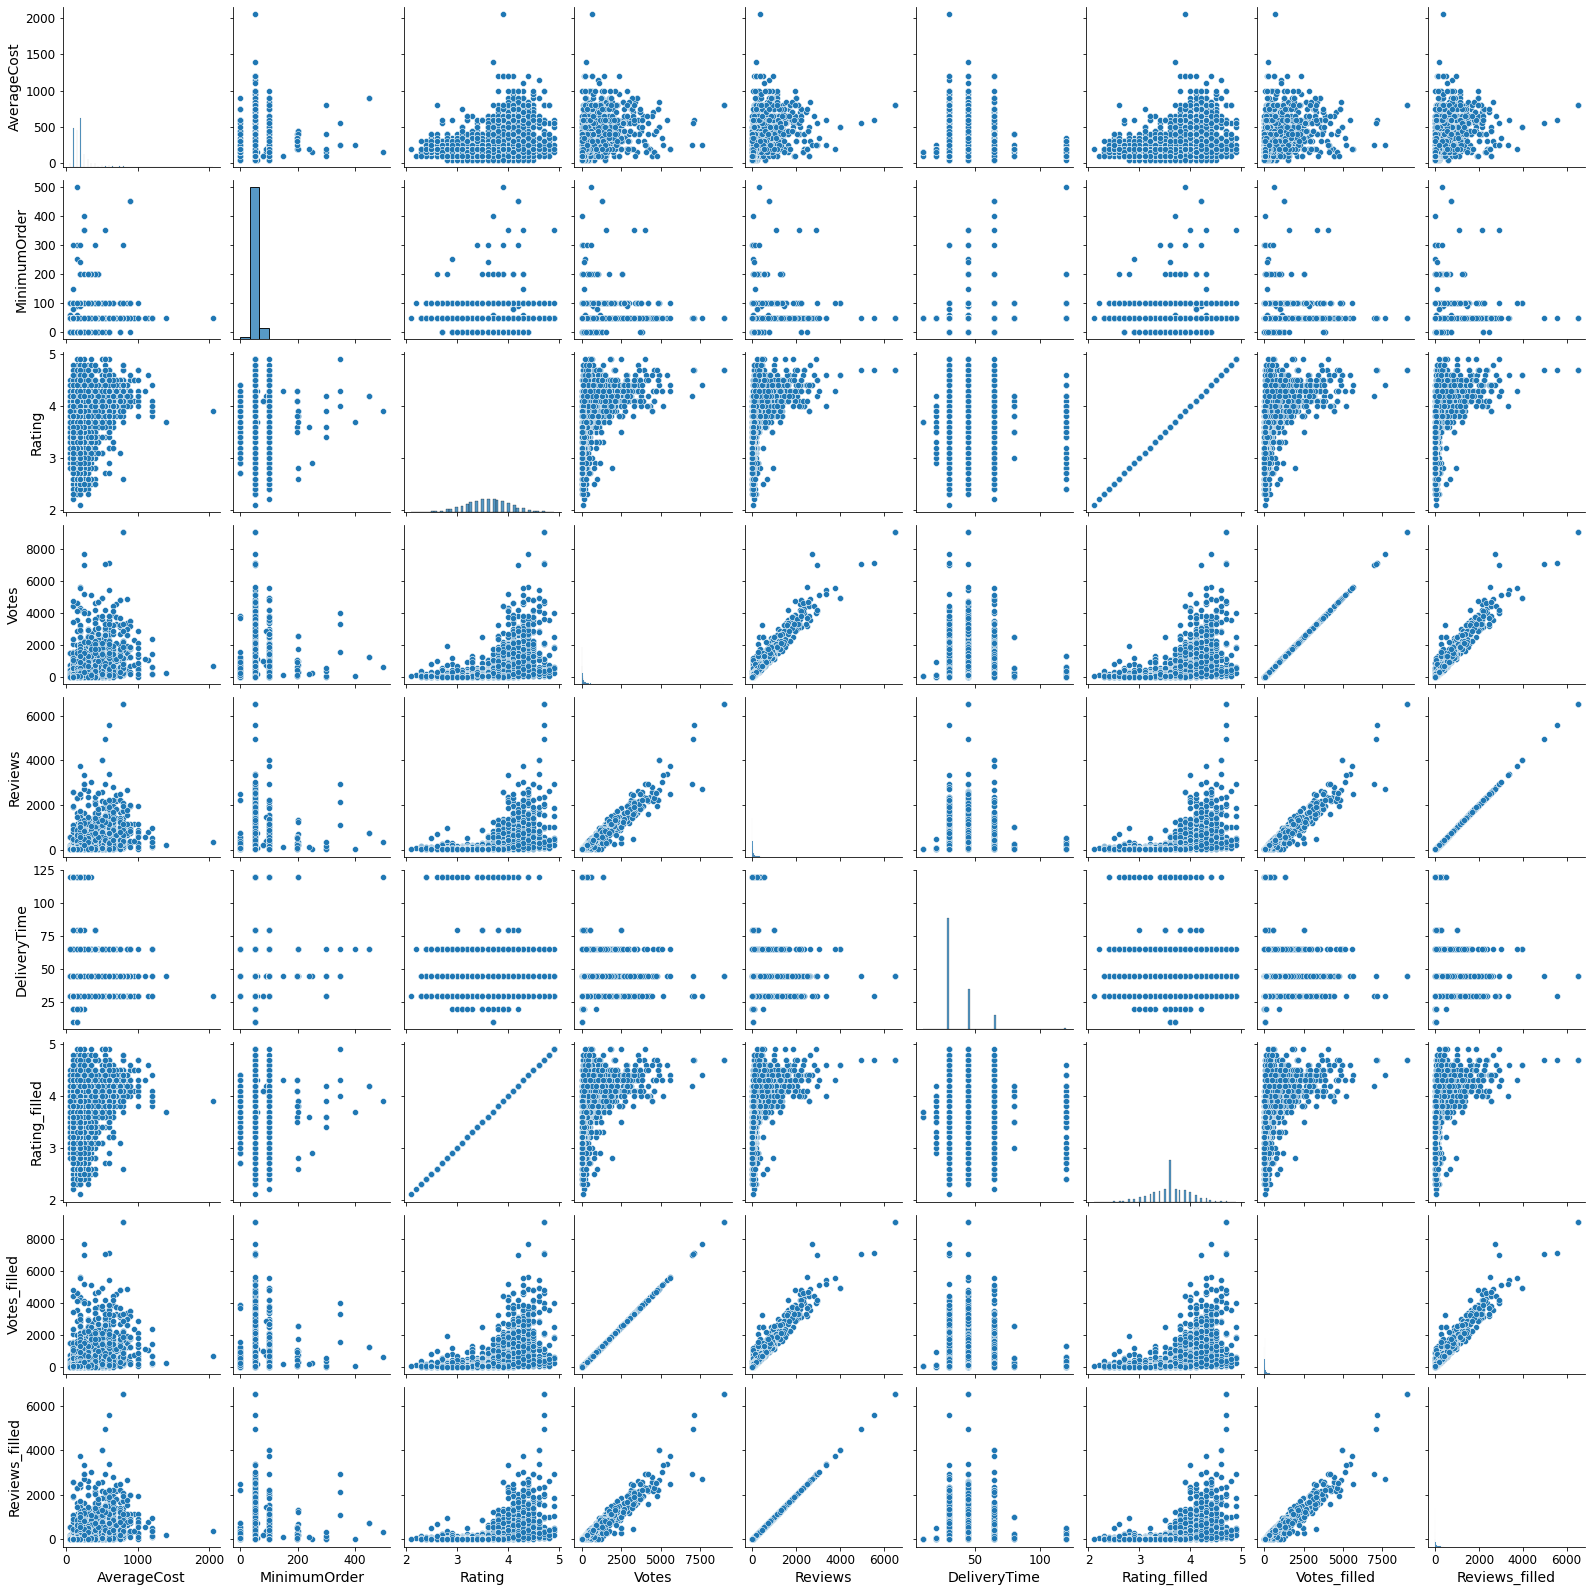

In [199]:
sns.pairplot(food)
plt.show()

votes와 review사이에 상관관계가 느껴집니다.
그냥 corr_chart으로는 delivery time은 상관관계가 크게 느껴지지는 않네요.

### 3-5. 데이터 스케일링

연속형 변수들 중 rating 말고는 정규분포 형태가 아니라 왼쪽으로 크게 skew된 분포를 보이고 있습니다. 그리고 값의 단위가 많이 다르기 때문에 이것도 스케일링이 필요해 보입니다.

<AxesSubplot:>

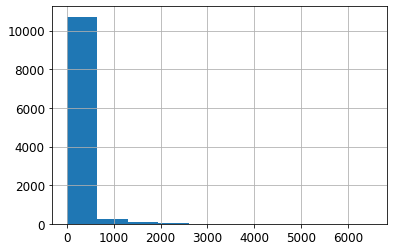

In [200]:
final["Reviews_filled"].hist()

In [201]:
final["log_Reviews"] = final["Reviews_filled"].map(lambda x: np.log(x, where=(x!=0)))

<AxesSubplot:>

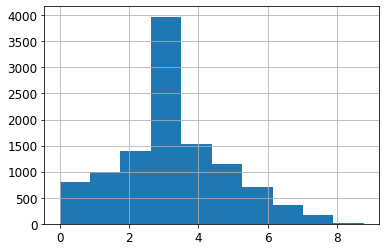

In [202]:
final["log_Reviews"].hist()

In [203]:
final['MinimumOrder'].value_counts()

50     10118
99       779
0        158
200        8
199        8
299        3
350        3
59         3
90         2
450        2
300        2
79         2
89         1
250        1
400        1
240        1
500        1
150        1
Name: MinimumOrder, dtype: int64

In [204]:
final["log_MinimumOrder"] = final["MinimumOrder"].map(lambda x: np.log(x, where=(x!=0)))
final["log_Votes"] = final["Votes_filled"].map(lambda x: np.log(x, where=(x!=0)))

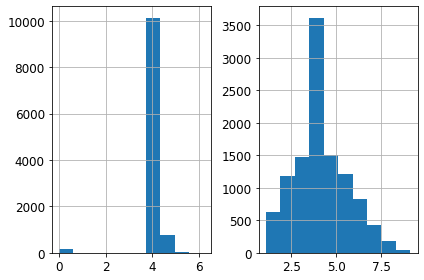

In [205]:
ax1 = plt.subplot(121)
final["log_MinimumOrder"].hist()
ax2 = plt.subplot(122)
final["log_Votes"].hist()
plt.tight_layout()
plt.show()

MinimumOrder는 로그한 그림이 별로 예쁘지 않네요.

In [206]:
#standard scaler
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()

In [207]:
final['st_log_Reviews'] = st_scaler.fit_transform(final['log_Reviews'] .values.reshape(-1,1))
final['st_log_MinimumOrder'] = st_scaler.fit_transform(final['log_MinimumOrder'] .values.reshape(-1,1))
final['st_log_Votes'] = st_scaler.fit_transform(final['log_Votes'] .values.reshape(-1,1))

In [208]:
final['st_Rating'] = st_scaler.fit_transform(final['Rating_filled'] .values.reshape(-1,1))

In [209]:
final[['st_log_Reviews','st_log_MinimumOrder', 'st_log_Votes', 'st_Rating']].describe()

,st_log_Reviews,st_log_MinimumOrder,st_log_Votes,st_Rating
count,1.109400e+04,1.109400e+04,1.109400e+04,1.109400e+04
mean,-6.010856e-16,7.493555e-17,-2.273686e-16,-3.032648e-16
std,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00
min,-2.101938e+00,-7.690261e+00,-2.130737e+00,-4.019743e+00
25%,-5.718514e-01,5.820536e-03,-6.448184e-01,-5.615062e-01
50%,-2.296069e-02,5.820536e-03,-3.583273e-02,-2.946966e-02
75%,5.417784e-01,5.820536e-03,5.924696e-01,5.025668e-01
max,3.500652e+00,4.535672e+00,3.382478e+00,3.428768e+00


In [210]:
final.head()

,Location_Feature_1,Location_Feature_2,Location_Feature_3,Location_Feature_4,Cuisines_Feature_1,Cuisines_Feature_2,Cuisines_Feature_3,Cuisines_Feature_4,Cuisines_Feature_5,Cuisines_Feature_6,...,Rating_filled,Votes_filled,Reviews_filled,log_Reviews,log_MinimumOrder,log_Votes,st_log_Reviews,st_log_MinimumOrder,st_log_Votes,st_Rating
0,16,26,47,0,32,84,21,85,102,0,...,3.5,12.0,4.0,1.386294,3.912023,2.484907,-1.217350,0.005821,-1.176842,-0.295488
1,56,32,0,0,43,30,0,0,0,0,...,3.5,11.0,4.0,1.386294,3.912023,2.397895,-1.217350,0.005821,-1.236714,-0.295488
2,37,0,0,0,48,93,32,0,0,0,...,3.6,99.0,30.0,3.401197,3.912023,4.595120,0.068351,0.005821,0.275174,-0.029470
3,54,43,0,0,69,74,27,0,0,0,...,3.7,176.0,95.0,4.553877,4.595120,5.170484,0.803871,1.349670,0.671076,0.236549
4,51,22,65,0,23,15,0,0,0,0,...,3.2,521.0,235.0,5.459586,4.595120,6.255750,1.381800,1.349670,1.417836,-1.093543


In [215]:
final.drop(["Votes","Reviews", 'Rating',"Votes_filled","Reviews_filled", 'log_Reviews', 'log_MinimumOrder','log_Votes'],axis=1,inplace=True)


In [216]:
final.head()

,Location_Feature_1,Location_Feature_2,Location_Feature_3,Location_Feature_4,Cuisines_Feature_1,Cuisines_Feature_2,Cuisines_Feature_3,Cuisines_Feature_4,Cuisines_Feature_5,Cuisines_Feature_6,Cuisines_Feature_7,Cuisines_Feature_8,Restaurant,AverageCost,DeliveryTime,st_log_Reviews,st_log_MinimumOrder,st_log_Votes,st_Rating
0,16,26,47,0,32,84,21,85,102,0,0,0,5086,200,30,-1.217350,0.005821,-1.176842,-0.295488
1,56,32,0,0,43,30,0,0,0,0,0,0,1785,100,30,-1.217350,0.005821,-1.236714,-0.295488
2,37,0,0,0,48,93,32,0,0,0,0,0,571,150,65,0.068351,0.005821,0.275174,-0.029470
3,54,43,0,0,69,74,27,0,0,0,0,0,4708,250,30,0.803871,1.349670,0.671076,0.236549
4,51,22,65,0,23,15,0,0,0,0,0,0,4896,200,65,1.381800,1.349670,1.417836,-1.093543


## 4. 머신러닝 알고리즘을 위해 데이터를 준비합니다 (prepare the data for Machine Learning algorithms).

### 4-1. 변수 만들기

In [217]:
final.shape

(11094, 19)

In [218]:
final.isnull().sum()

Location_Feature_1     0
Location_Feature_2     0
Location_Feature_3     0
Location_Feature_4     0
Cuisines_Feature_1     0
Cuisines_Feature_2     0
Cuisines_Feature_3     0
Cuisines_Feature_4     0
Cuisines_Feature_5     0
Cuisines_Feature_6     0
Cuisines_Feature_7     0
Cuisines_Feature_8     0
Restaurant             0
AverageCost            0
DeliveryTime           0
st_log_Reviews         0
st_log_MinimumOrder    0
st_log_Votes           0
st_Rating              0
dtype: int64

In [219]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location_Feature_1   11094 non-null  int64  
 1   Location_Feature_2   11094 non-null  int64  
 2   Location_Feature_3   11094 non-null  int64  
 3   Location_Feature_4   11094 non-null  int64  
 4   Cuisines_Feature_1   11094 non-null  int64  
 5   Cuisines_Feature_2   11094 non-null  int64  
 6   Cuisines_Feature_3   11094 non-null  int64  
 7   Cuisines_Feature_4   11094 non-null  int64  
 8   Cuisines_Feature_5   11094 non-null  int64  
 9   Cuisines_Feature_6   11094 non-null  int64  
 10  Cuisines_Feature_7   11094 non-null  int64  
 11  Cuisines_Feature_8   11094 non-null  int64  
 12  Restaurant           11094 non-null  int64  
 13  AverageCost          11094 non-null  int64  
 14  DeliveryTime         11094 non-null  int64  
 15  st_log_Reviews       11094 non-null 

### 4-2. 트레인-테스트 분리

In [229]:
#y label 분리
y = final["DeliveryTime"].copy()
X = final.drop("DeliveryTime", axis=1) # drop labels for training set


In [230]:
#train, test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True, random_state=42)

## 5. 모델을 선택하고 훈련시킵니다 (select a model and train it).

### 5-1. linear regression

In [232]:
from sklearn.linear_model import LinearRegression
#인스턴스, fit
m_lr = LinearRegression()
m_lr.fit(X_train, y_train)

LinearRegression()

In [233]:
#predict
y_pred = m_lr.predict(X_test)


In [226]:

from sklearn.metrics import mean_squared_error as mse, r2_score as r2
import math

In [234]:
# 평가 R^2 RMSE구하라
print('R^2: ', r2(y_test,y_pred))
print('RSME: ',math.sqrt(mse(y_test,y_pred)))

R^2:  0.1154308062460272
RSME:  11.282984939296238


규제화 해보기

In [235]:
from sklearn.linear_model import Ridge, Lasso

In [236]:
#1. 인스턴스화
# alpha : 하이퍼 파라미터 규제의 강도
ridge_model = Ridge(alpha = 1)
# 2. 적합화
ridge_model.fit(X_train,y_train)
# 3. 예측
y_pred = ridge_model.predict(X_test)

In [238]:
# 4. 평가 RMSE와 R^2
#R^2
print('ridge (alpha 1) R^2: ', r2(y_test, y_pred))

# RMSE
print('ridge (alpha 1) RMSE: ', math.sqrt(mse(y_test, y_pred)))

ridge (alpha 1) R^2:  0.11544846655691643
ridge (alpha 1) RMSE:  11.282872307057993


In [239]:
#1. 인스턴스화
lasso_model = Lasso(alpha = 1)

# 2. 적합화(학습)
lasso_model.fit(X_train, y_train)

# 3. 예측
y_pred = lasso_model.predict(X_test)

# 4. 평가 RMSE와 R^2

#R^2
print('lasso (alpha 1) R^2: ', r2(y_test, y_pred))
# RMSE
print('lasso (alpha 1) RMSE: ', math.sqrt(mse(y_test, y_pred)))

R^2:  0.09716848295521918
RMSE:  11.398861030318445


### 5-2. Decision Tree

In [241]:
from sklearn.tree import DecisionTreeRegressor

In [242]:
# 인스턴스화 max_depth 조절 가능.
dt = DecisionTreeRegressor(max_depth=5, random_state = 42)

dt.fit(X_train,y_train)

#predict
y_pred = dt.predict(X_test)

# 4. 평가 RMSE와 R^2
#R^2
print('decision tree R^2: ', r2(y_test, y_pred))

# RMSE
print('decision tree RMSE: ', math.sqrt(mse(y_test, y_pred)))

decision tree R^2:  0.20525806332523477
decision tree RMSE:  10.694763086160124


### 5-3. Random Forest 

In [245]:
from sklearn.ensemble import RandomForestRegressor


In [248]:
rf = RandomForestRegressor(n_estimators = 500, max_depth=7, random_state =0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("random forest RMSE:", math.sqrt(mse(y_test,y_pred)))
print("random forest R2:", r2(y_test, y_pred))

random forest RMSE: 10.224324370597502
random forest R2: 0.2736381401990736


## 6. 모델을 상세하게 조정합니다 (fine-tune your model).

### 6-1. Grid Search 

### 6-2. Randomized Search

## 7. 솔루션을 제시합니다 (present your solution).

### 특성 중요도, 에러 분석

### 최종 평가

## 8. 시스템을 론칭하고 모니터링하고 유지 보수합니다 (launch, monitor, and maintain your system).